In [1]:
import sys
sys.path.append('/Users/simon/git/burns/code/')

In [140]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [123]:
data_dir = '/Users/simon/Dropbox/BioResearch/Meta_clustering/Burns/simon_test/'


In [309]:
group1 = ['MSS1a','MSS5a','MSS5A1','MSS6a']
group2 = ['MSS10a','MSS11a','MSS11a1','MSS14a','MSS14a1']


In [310]:
from load_di import load_di

In [311]:
# s = load_di(group1[0])
data = {}
for f in group1+group2:
    data[f] = load_di(data_dir+f+'.mzML',out_file = '../csv_files/'+f+'.csv')

Do some of Joe's matching

In [312]:
from matching import MassOnlyMatching

In [144]:
input_set = ['../csv_files/'+g+'.csv' for g in data.keys()]
print input_set

['../csv_files/MSS14a.csv', '../csv_files/MSS11a.csv', '../csv_files/MSS10a.csv', '../csv_files/MSS5a.csv', '../csv_files/MSS1a.csv', '../csv_files/MSS6a.csv']


In [147]:
mz_tol = 5
m = MassOnlyMatching()
results = m.process(input_set,mz_tol)

Reference is ../csv_files/MSS14a.csv (447 features)

Processing ../csv_files/MSS11a.csv (474 features)
Computing scores
Matching
257 matched feature pairs
190 unmatched features from feature_list_1
217 unmatched features from feature_list_2

Processing ../csv_files/MSS10a.csv (498 features)
Computing scores
Matching
182 matched feature pairs
265 unmatched features from feature_list_1
316 unmatched features from feature_list_2

Processing ../csv_files/MSS5a.csv (605 features)
Computing scores
Matching
178 matched feature pairs
269 unmatched features from feature_list_1
427 unmatched features from feature_list_2

Processing ../csv_files/MSS1a.csv (467 features)
Computing scores
Matching
243 matched feature pairs
204 unmatched features from feature_list_1
224 unmatched features from feature_list_2

Processing ../csv_files/MSS6a.csv (506 features)
Computing scores
Matching
289 matched feature pairs
158 unmatched features from feature_list_1
217 unmatched features from feature_list_2



In [155]:
import numpy as np
n_features = len(results)
files = data.keys()
n_files = len(files)
d_mat = np.zeros((n_files,n_features),np.float)
col_pos = 0
for result in results:
    for f in result:
        intensity = f[1]
        filename = f[2].split('/')[-1].split('.')[0]
        file_pos = files.index(filename)
        d_mat[file_pos,col_pos] = intensity
    col_pos += 1

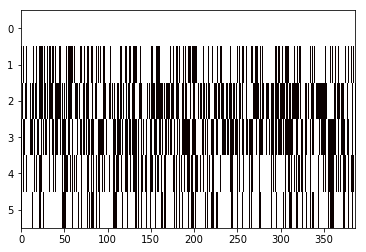

In [164]:
plt.imshow(d_mat>0,aspect='auto',cmap='hot')

In [313]:
normalised_data = {}
for f,spec in data.items():
    mz,inte = zip(*spec)
    max_inte = max(inte)
    print max_inte
    new_inte = [100.0*i/max_inte for i in inte]
    new_spec = zip(mz,new_inte)
    normalised_data[f] = new_spec

20031900.0
18621800.0
53912856.0
201686656.0
61863456.0
48274388.0
26581440.0
29857868.0
29622992.0


In [320]:
from matching import Greedy
g = Greedy()
mp= g.process(normalised_data,5)
from scipy.stats import ttest_ind
small = 0.0
test_results = []
for ps in mp:
    g1 = []
    g2 = []
    for p in ps.peaks:
        filename = p[2]
        if filename in group1:
            g1.append(p[1])
        else:
            g2.append(p[1])
    if len(g1) < 2 and len(g2) < 2:
        continue
    else:
        for i in range(len(g1),len(group1)):
            g1.append(small)
        for i in range(len(g2),len(group2)):
            g2.append(small)
        t,p = ttest_ind(g1,g2)
        test_results.append((ps,t,p))
        
test_results = sorted(test_results,key = lambda x: x[2])

for ps,t,p in test_results[:50]:
#     if np.floor(ps.mean_mz) == 115:
        print ps.mean_mz,p
        g1peaks = []
        g2peaks = []
        for p in ps.peaks:
            if p[2] in group1:
                g1peaks.append(p)
            else:
                g2peaks.append(p)
        print "Group1:"
        for p in g1peaks:
            print '\t',p[1],p[2]
        print
        print "Group2:"
        for p in g2peaks:
            print '\t',p[1],p[2]
        print


        print
        print
        print
        print
        

4339 peaks
97.9915747202 5.67547663786e-05
Group1:
	0.923187156881 MSS5a
	1.34021248493 MSS1a
	2.7564174963 MSS5A1
	2.25470384599 MSS6a

Group2:
	5.25081948249 MSS11a1
	7.14141400707 MSS14a1
	6.36217420714 MSS14a
	6.82067724388 MSS11a
	7.23900246529 MSS10a





192.606784347 0.000188088452651
Group1:

Group2:
	0.774182258831 MSS11a
	0.415543012797 MSS14a1
	0.480036001315 MSS11a1
	0.682956933691 MSS14a
	0.802170756899 MSS10a





183.601473887 0.000369218505528
Group1:
	0.219671641668 MSS1a
	0.403774953383 MSS5A1

Group2:
	0.852897205772 MSS11a1
	0.810781854007 MSS14a1
	0.860552652894 MSS14a
	1.22688369612 MSS11a
	1.12706849084 MSS10a





90.5261086724 0.00189066577851
Group1:
	2.19280911173 MSS5A1
	1.22840250756 MSS5a
	3.15110632644 MSS6a
	1.60297837437 MSS1a

Group2:
	4.51796909947 MSS11a1
	5.24407780956 MSS14a1
	8.18340869304 MSS11a
	8.28404944114 MSS14a
	8.06373427105 MSS10a





81.5208297305 0.00415356096256
Group1:
	2.59905096476 MSS5A1
	1.02910623488 MSS5a
	1.53781726865 MSS1a


In [229]:
for p in mp:
    if len(p.peaks) == 6:
        print p

(70.0128232796,MSS5a) (70.0128258618,MSS1a) (70.0128414759,MSS6a) (70.0128483179,MSS14a) (70.0128620229,MSS11a) (70.0128728061,MSS10a)
(70.9806655117,MSS5a) (70.9806672059,MSS1a) (70.9806931885,MSS14a) (70.980696867,MSS11a) (70.9807058168,MSS10a) (70.9807151856,MSS6a)
(71.9521066639,MSS5a) (71.9521305499,MSS6a) (71.9521326705,MSS1a) (71.9521400038,MSS11a) (71.9521538437,MSS14a) (71.952176045,MSS10a)
(74.975601179,MSS14a) (74.975604677,MSS11a) (74.9756083535,MSS5a) (74.9756102873,MSS1a) (74.9756230501,MSS10a) (74.9756237203,MSS6a)
(78.5204746348,MSS5a) (78.5204904729,MSS1a) (78.5205002471,MSS14a) (78.5205169387,MSS6a) (78.5205231207,MSS11a) (78.520526807,MSS10a)
(80.0497230208,MSS14a) (80.0497331635,MSS5a) (80.0497354895,MSS11a) (80.0497414349,MSS1a) (80.049756476,MSS10a) (80.0497577777,MSS6a)
(81.0700988708,MSS5a) (81.0701093872,MSS1a) (81.0701323851,MSS14a) (81.070157634,MSS11a) (81.0701596277,MSS6a) (81.0701790174,MSS10a)
(81.5208271985,MSS11a) (81.5208290112,MSS14a) (81.5208316111,M

In [121]:
s = sorted(s,key = lambda x: x[0])
blanks = sorted(blanks,key = lambda x: x[0])
print s

[(70.01287280606142, 65347608.0), (70.51453284165632, 2560842.25), (70.98070581677707, 9081548.0), (71.51269356802491, 2055261.75), (71.95217604499183, 11394235.0), (72.5205156757884, 812039.75), (73.01252589781912, 1086694.75), (73.53208417017125, 819057.0625), (74.02035758566144, 2428790.5), (74.51799541194028, 1980834.5), (74.97562305006979, 29795856.0), (76.01782437131213, 3841201.0), (77.02070429283205, 1511110.25), (77.5127009242014, 492380.9375), (78.02292285665287, 1950474.875), (78.52052680702275, 33305310.0), (79.01816359044689, 23461582.0), (79.51983652588028, 1207724.625), (80.04975647596952, 1118559.875), (80.51799006215934, 2580630.25), (81.01461730077837, 1015491.25), (81.07017901744625, 645726.25), (81.5208544655592, 23188784.0), (82.01447794582624, 2195987.5), (82.537385456772, 1465133.25), (83.02563621346975, 2651063.75), (83.51730349815818, 684032.0625), (84.01529117614353, 618789.1875), (84.52055125829615, 285889.15625), (84.95996117965643, 166026624.0), (85.5283475

616.834394748


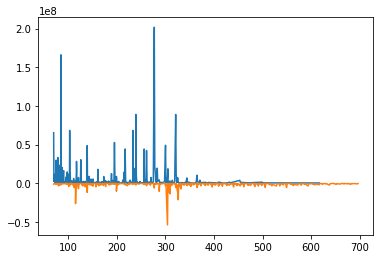

In [122]:
x = [p[0] for p in s]
y = [p[1] for p in s]
%matplotlib inline
plt.plot(x,y)
xb = [p[0] for p in blanks]
yb = [-p[1] for p in blanks]
plt.plot(xb,yb)
print max(x)


In [109]:
import numpy as np
mz,inte = zip(*s)
mz = np.array(mz)
inte = np.array(inte)
print mz[inte.argmax()]

ss = sorted(s,key = lambda x: x[1],reverse=True)
print ss[1:10]

277.1050503
[(84.95996117965643, 166026624.0), (239.14931644809047, 88939096.0), (321.1314147488065, 88937840.0), (102.97052830288665, 68308792.0), (233.07871500336745, 68201592.0), (70.01287280606142, 65347608.0), (195.1229599996206, 52675704.0), (300.2018366040333, 49075284.0), (139.051834892675, 48646380.0)]


In [46]:
new_traces = []
mtd.run(new_exp,new_traces)

In [63]:
pp = PeakPickerCWT()
pa = pp.getParameters()
pa['peak_width'] = 0.0001
pa['signal_to_noise'] = 0.0
pp.setParameters(pa)
print pp.getParameters()['peak_width']
print pa.asDict()

0.0001
{'thresholds:search_radius': 3, 'deconvolution:fitting:penalties:left_width': 0.0, 'centroid_percentage': 0.8, 'SignalToNoiseEstimationParameter:auto_max_percentile': 95, 'fwhm_upper_bound_factor': 20.0, 'deconvolution:deconvolution': 'false', 'deconvolution:fitting:eps_rel': 9.999999747378752e-06, 'deconvolution:fitting:penalties:position': 0.0, 'deconvolution:right_width': 2.0, 'peak_width': 0.0001, 'signal_to_noise': 0.0, 'SignalToNoiseEstimationParameter:auto_mode': 0, 'thresholds:peak_bound': 10.0, 'deconvolution:fitting:eps_abs': 9.999999747378752e-06, 'SignalToNoiseEstimationParameter:win_len': 200.0, 'deconvolution:scaling': 0.12, 'deconvolution:left_width': 2.0, 'SignalToNoiseEstimationParameter:stdev_mp': 3.0, 'optimization:penalties:right_width': 1.0, 'SignalToNoiseEstimationParameter:noise_for_empty_window': 1e+20, 'deconvolution:asym_threshold': 0.3, 'optimization:iterations': 400, 'wavelet_transform:spacing': 0.001, 'thresholds:correlation': 0.5, 'deconvolution:fit

In [64]:
new_exp = MSExperiment()
pp.pickExperiment(exp,new_exp)